In [2]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.6/607.6 kB 5.5 MB/s eta 0:00:00


In [6]:
!wget https://hips.hearstapps.com/ghk.h-cdn.co/assets/17/30/pembroke-welsh-corgi.jpg -O "dog.jpg"

--2023-07-25 05:05:48--  https://hips.hearstapps.com/ghk.h-cdn.co/assets/17/30/pembroke-welsh-corgi.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221550 (216K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 216.36K  --.-KB/s    in 0.004s  

2023-07-25 05:05:48 (51.4 MB/s) - ‘dog.jpg’ saved [221550/221550]



In [7]:
import cv2
cv2.imwrite("dog_1.jpg",cv2.resize(cv2.imread("dog.jpg"),(500,500)))

True

In [8]:
#### using pretrain model object detection using cli
!yolo task=detect mode=predict model=yolov8n.pt source=dog_1.jpg

100% 6.23M/6.23M [00:00<00:00, 18.1MB/s]
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/dog_1.jpg: 640x640 1 dog, 8.0ms
Speed: 7.0ms preprocess, 8.0ms inference, 45.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


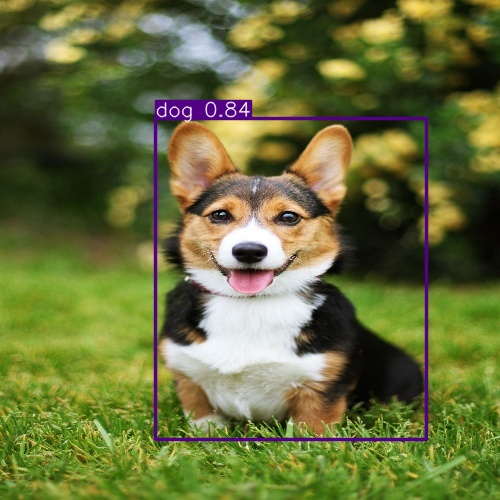

In [9]:
from IPython.display import Image
Image("/content/runs/detect/predict/dog_1.jpg")

In [10]:
#### using pretrain model object seg using cli
!yolo task=segment mode=predict model=yolov8n-seg.pt source=dog_1.jpg

100% 6.73M/6.73M [00:00<00:00, 341MB/s]
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients

image 1/1 /content/dog_1.jpg: 640x640 1 dog, 10.2ms
Speed: 4.6ms preprocess, 10.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


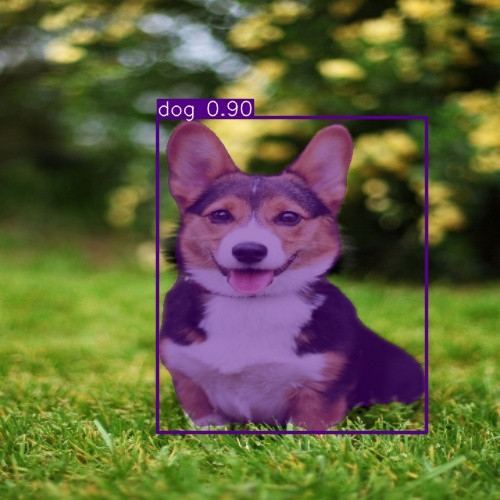

In [11]:
Image("/content/runs/segment/predict/dog_1.jpg")

In [ ]:
### working with pythonic way
from ultralytics import YOLO
model=YOLO("yolov8n-seg.pt")
model.predict(source="dog_1.jpg")

In [16]:
#### classification using pretrain model on COCO data
!yolo task=classify mode=predict model=yolov8n-cls.pt source=dog_1.jpg

100% 5.28M/5.28M [00:00<00:00, 5.63MB/s]
Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients

100% 755k/755k [00:00<00:00, 147MB/s]
image 1/1 /content/dog_1.jpg: 224x224 Cardigan 0.69, Pembroke 0.26, Appenzeller 0.02, basenji 0.01, papillon 0.00, 3.9ms
Speed: 33.6ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


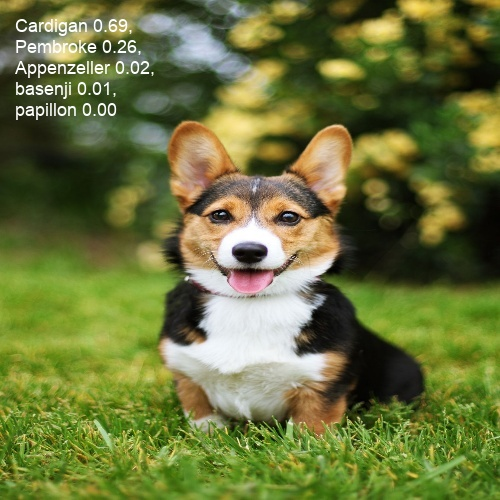

In [17]:
Image("/content/runs/classify/predict/dog_1.jpg")

In [24]:
#### prepare data
import os,shutil,glob
os.makedirs("/root/.kaggle",exist_ok=True)

In [19]:
os.rename("kaggle (1).json","kaggle.json")

In [21]:
shutil.move("kaggle.json","/root/.kaggle")
os.chmod("/root/.kaggle",0o600)

In [ ]:
!kaggle datasets download -d sathishbili/vegitable-withlabel-yolo

In [30]:
# shutil.rmtree("label_imgs/")

In [ ]:
!unzip /content/vegitable-withlabel-yolo.zip

In [32]:
TR_R=0.9
TE_R=0.1
all_txts=glob.glob("label_imgs/*.txt")
all_txts.remove("label_imgs/classes.txt")
train_txts=all_txts[:int(len(all_txts)*TR_R)]
test_txts=all_txts[int(len(all_txts)*TR_R):]

In [33]:
os.makedirs("label_imgs/train/images")
os.makedirs("label_imgs/train/labels")
os.makedirs("label_imgs/test/images")
os.makedirs("label_imgs/test/labels")

In [ ]:
[
   ( shutil.move(txt,"label_imgs/train/labels"),
    shutil.move(os.path.splitext(txt)[0]+".jpg","label_imgs/train/images")

    )
    for txt in train_txts
]


[
   ( shutil.move(txt,"label_imgs/test/labels"),
    shutil.move(os.path.splitext(txt)[0]+".jpg","label_imgs/test/images")

    )
    for txt in test_txts
]

In [35]:
classes=["chow_chow",
"lemon",
"big_onion",
"tomato",
"off_coconut",
"brinjal",
"chilli",
"flat_beans",
"beans",
"potato",
"carrot",
"beetroot"]

In [36]:
data={
    "train":"train/images",
    "val":"test/images",
    "nc":len(classes),
    "names":classes
}

In [37]:
import yaml
with open("label_imgs/data.yaml","w") as yf:
  yaml.safe_dump(data,yf)

In [60]:
model=YOLO("/content/runs/detect/train9/weights/best.pt")
model.train(data="data.yaml",epochs=20)

Ultralytics YOLOv8.0.141 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train9/weights/best.pt, data=data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fal

In [61]:
result=model.predict("/content/datasets/label_imgs/test/images/a90b52c6-2851-11ee-8b8f-e8d0fcc920d2.jpg")


image 1/1 /content/datasets/label_imgs/test/images/a90b52c6-2851-11ee-8b8f-e8d0fcc920d2.jpg: 384x640 2 potatos, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


In [59]:
classes[9]

'potato'

In [70]:
imgarr=cv2.imread("/content/datasets/label_imgs/test/images/a90b52c6-2851-11ee-8b8f-e8d0fcc920d2.jpg")

tensor([748.9593, 171.8615, 989.8932, 373.1393], device='cuda:0')


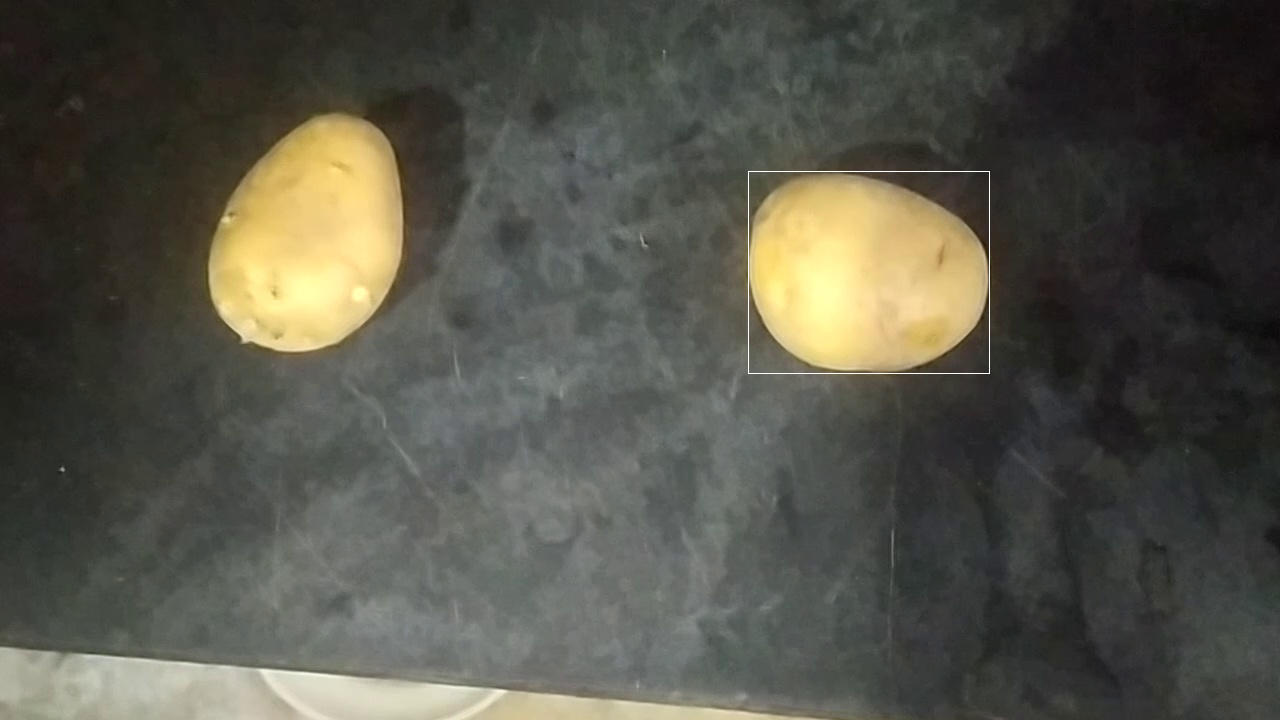

In [81]:
bbox=result[0].boxes.data[0][:-2]
print(bbox)
bbox=[int(i)for i in bbox]
# print(list(bbox[2:]))
img=cv2.rectangle(imgarr,bbox[:2],bbox[2:],(255,255,255))
cv2_imshow(img)

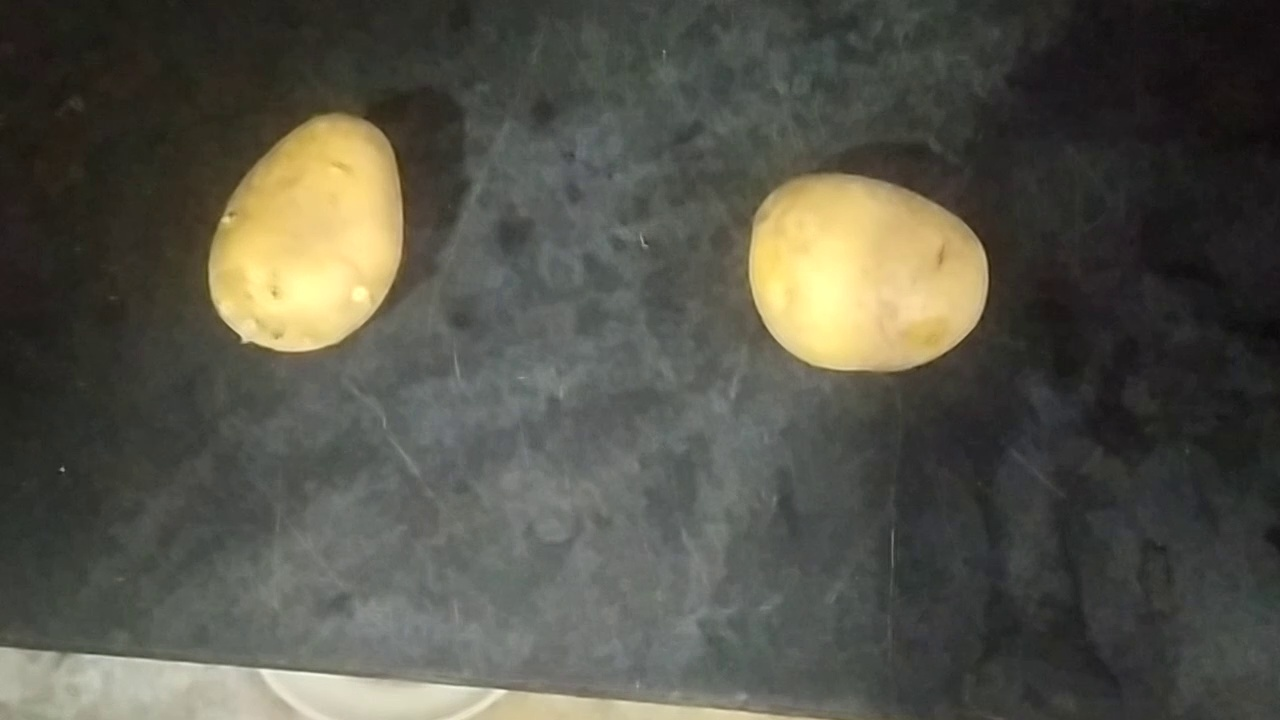

In [66]:
from google.colab.patches import cv2_imshow
cv2_imshow(result[0].orig_img)

In [41]:
with open("/root/.config/Ultralytics/settings.yaml") as f:
  print(yaml.safe_load(f))

{'settings_version': '0.0.4', 'datasets_dir': '/content/datasets', 'weights_dir': 'weights', 'runs_dir': 'runs', 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb', 'sync': True, 'api_key': '', 'clearml': True, 'comet': True, 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'tensorboard': True, 'wandb': True}


In [42]:
os.makedirs("datasets")
shutil.move("label_imgs/","datasets")

'datasets/label_imgs'